## 凸性
凸性（convexity）在优化算法的设计中起到⾄关重要的作⽤，这主要是由于在这种情况下对算法进⾏分析和
测试要容易。换⾔之，如果算法在凸性条件设定下的效果很差，那通常我们很难在其他条件下看到好的结果。
此外，即使深度学习中的优化问题通常是⾮凸的，它们也经常在局部极⼩值附近表现出⼀些凸性。这可能会
产⽣⼀些像 (Izmailov et al., 2018)这样⽐较有意思的新优化变体。

In [1]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

### 定义
在进⾏凸分析之前，我们需要定义凸集（convex sets）和凸函数（convex functions）。

#### 凸集
凸集（convex set）是凸性的基础。简单地说，如果对于任何a, b ∈ X，连接a和b的线段也位于X中，则向量
空间中的⼀个集合X是凸（convex）的。在数学术语上，这意味着对于所有λ ∈ [0, 1]，我们得到  
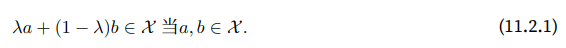

这听起来有点抽象，那我们来看⼀下 图11.2.1⾥的例⼦。第⼀组存在不包含在集合内部的线段，所以该集合
是⾮凸的，⽽另外两组则没有这样的问题。

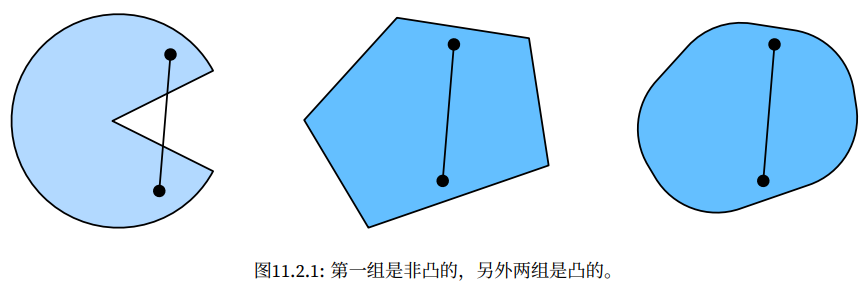

接下来来看⼀下交集 图11.2.2。假设X和Y是凸集，那么X ∩ Y也是凸集的。现在考虑任意a, b ∈ X ∩ Y，因
为X和Y是凸集，所以连接a和b的线段包含在X和Y中。鉴于此，它们也需要包含在X ∩ Y中，从⽽证明我们
的定理。

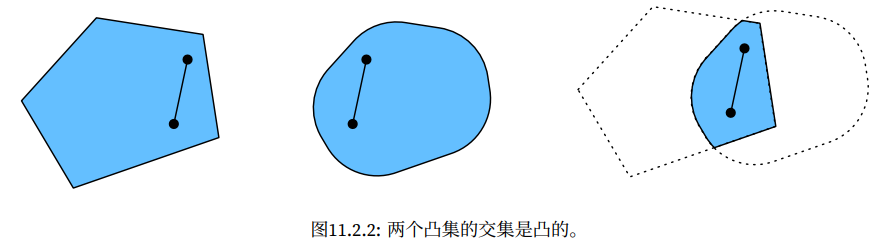

我们可以毫不费⼒地进⼀步得到这样的结果：给定凸集Xi，它们的交集∩iXi是凸的。但是反向是不正确的，
考虑两个不相交的集合X ∩ Y = ∅，取a ∈ X和b ∈ Y。因为我们假设X ∩ Y = ∅，在 图11.2.3中连接a和b的线
段需要包含⼀部分既不在X也不在Y中。因此线段也不在X ∪ Y中，因此证明了凸集的并集不⼀定是凸的，即
⾮凸（nonconvex）的。

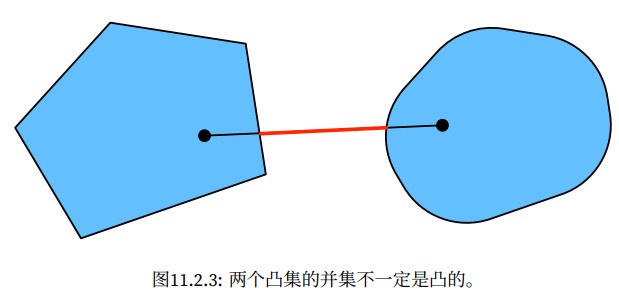

通 常， 深 度 学 习 中 的 问 题 是 在 凸 集 上 定 义 的。 例 如，R
d， 即 实 数 的d-维 向 量 的 集 合 是 凸 集 （毕
竟:math:mathbb{R}^d中任意两点之间的线存在R
d）中。在某些情况下，我们使⽤有界⻓度的变量，例如
球的半径定义为{x|x ∈ R
d 且∥x∥ ≤ r}。

#### 凸函数
现在我们有了凸集，我们可以引⼊凸函数（convex function）f。给定⼀个凸集X，如果对于所有x, x′ ∈ X和
所有λ ∈ [0, 1]，函数f : X → R是凸的，我们可以得到

现在我们有了凸集，我们可以引⼊凸函数（convex function）f。给定⼀个凸集X，如果对于所有x, x′ ∈ X和
所有λ ∈ [0, 1]，函数f : X → R是凸的，我们可以得到

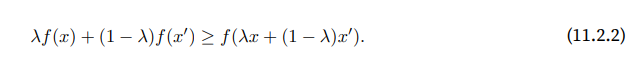

为了说明这⼀点，让我们绘制⼀些函数并检查哪些函数满⾜要求。下⾯我们定义⼀些函数，包括凸函数和⾮
凸函数。



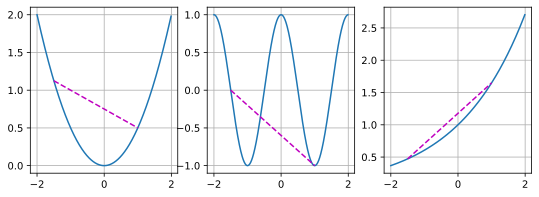

In [2]:
f = lambda x: 0.5 * x**2 # 凸函数
g = lambda x: torch.cos(np.pi * x) # ⾮凸函数
h = lambda x: torch.exp(0.5 * x) # 凸函数

x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1])
d2l.use_svg_display()
_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
    d2l.plot([x, segment], [func(x), func(segment)], axes=ax)


不出所料，余弦函数为⾮凸的，⽽抛物线函数和指数函数为凸的。请注意，为使该条件有意义，X是凸集的
要求是必要的。否则可能⽆法很好地界定f(λx + (1 − λ)x′)的结果。
